# I] Import and options


In [32]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [33]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [34]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [35]:
path = output_file_directory + "ATG7/MEF_HuH7/Seahorse_results/"

# II] DL data

## A) Extracellular Acidification Rate 

In [5]:
%%time
file_names = "ecar_final_exp1_", "ecar_final_exp2_", "ecar_final_exp3_"
all_conditions = "dmso", "baf"

ecar_exps = []
#for DMSO and BAF
for condition in all_conditions:
    #For experiment 1, 2 and 3
    for file_name in file_names: 
        #download data
        path2 = f'/seahorse_ECAR/dataframes_for_input/{file_name}{condition}.csv'
        df_ori = pandas.read_csv(path+path2, sep = ",")
        print(df_ori.iloc[:2,5:])

        ecar_exps.append(df_ori)

len(ecar_exps)

         info  drug   exp
0  glycolysis  dmso  exp1
1  glycolysis  dmso  exp1
         info  drug   exp
0  glycolysis  dmso  exp2
1  glycolysis  dmso  exp2
         info  drug   exp
0  glycolysis  dmso  exp3
1  glycolysis  dmso  exp3
         info drug   exp
0  glycolysis  baf  exp1
1  glycolysis  baf  exp1
         info drug   exp
0  glycolysis  baf  exp2
1  glycolysis  baf  exp2
         info drug   exp
0  glycolysis  baf  exp3
1  glycolysis  baf  exp3
Wall time: 33.9 ms


6

In [6]:
ecar_exps_subst = []
for df in ecar_exps:
    mean_neg_EV = df.loc[6:8,'Empty Vector -dox'].mean()
    mean_neg_EVd = df.loc[6:8,'Empty Vector +dox'].mean()
    mean_neg_iso1 = df.loc[6:8,'ATG7(1)'].mean()
    mean_neg_iso2 = df.loc[6:8,'ATG7(2)'].mean()

    df= df.assign(EV_noD = (df['Empty Vector -dox'] - mean_neg_EV),
                  EVd = (df['Empty Vector +dox'] - mean_neg_EVd),
                  ATG7_1 = (df['ATG7(1)'] - mean_neg_iso1),
                  ATG7_2 = (df['ATG7(2)'] - mean_neg_iso2)) 

    #select columns and don't take the negative controls
    cols = ['Time', 'EV_noD', 'EVd', 'ATG7_1', 'ATG7_2', 'info', 'drug', 'exp']
    df= df.loc[0:5, cols]
    ecar_exps_subst.append(df)
    
df

,Time,EV_noD,EVd,ATG7_1,ATG7_2,info,drug,exp
0,40.102374,0.704582,0.694421,0.990007,0.480623,glycolysis,baf,exp3
1,46.546482,1.057699,1.211769,1.232619,0.779844,glycolysis,baf,exp3
2,53.000464,1.291994,1.469659,1.432075,0.974741,glycolysis,baf,exp3
3,59.533737,3.321771,3.921083,4.170253,2.351342,max_glycolysis,baf,exp3
4,65.984421,3.361804,4.350832,4.629529,2.862281,max_glycolysis,baf,exp3
5,72.436794,3.956374,5.113028,5.027904,3.305405,max_glycolysis,baf,exp3


In [7]:
len(ecar_exps_subst)

6

In [123]:
#non normalized to see diff with baf 
ecar_exps_subst = pandas.concat([ecar_exps_subst[0], ecar_exps_subst[1], ecar_exps_subst[2],
                              ecar_exps_subst[3], ecar_exps_subst[4], ecar_exps_subst[5]], axis=0)
ecar_exps_subst= ecar_exps_subst.drop(['Time'], axis =1)
ecar_exps_subst.head()

,EV_noD,EVd,ATG7_1,ATG7_2,info,drug,exp
0,0.802667,1.833333,2.9650,2.302222,glycolysis,dmso,exp1
1,1.168667,2.265833,3.8650,2.620556,glycolysis,dmso,exp1
2,1.584667,2.725833,4.4950,2.967222,glycolysis,dmso,exp1
3,1.862667,3.053333,5.0050,4.250556,max_glycolysis,dmso,exp1
4,2.130667,3.488333,5.5725,5.710556,max_glycolysis,dmso,exp1


In [21]:
steps = 'glycolysis', 'max_glycolysis'

ecar_exps_norm = pandas.DataFrame()
for df in ecar_exps_subst:
    for step in steps:
        data = df.loc[df['info'] == step]
        
        #normalize on EV
        norm_df = data.assign(EV_dox_ctl= data['EVd']/ data['EV_noD'],
                              EV_norm= data['EVd']/ data['EVd'],
                              ATG7_1norm= data['ATG7_1']/ data['EVd'],
                              ATG7_2norm= data['ATG7_2']/ data['EVd'])

        ecar_exps_norm = pandas.concat([ecar_exps_norm, norm_df], axis=0)
        
ecar_exps_norm = ecar_exps_norm[['EV_dox_ctl', 'EV_norm', 'ATG7_1norm', 'ATG7_2norm', 'info', 'drug', 'exp']] 
ecar_exps_norm.reset_index(drop = 'True', inplace = True)
ecar_exps_norm.head()

,EV_dox_ctl,EV_norm,ATG7_1norm,ATG7_2norm,info,drug,exp
0,2.284053,1.0,1.617273,1.255758,glycolysis,dmso,exp1
1,1.938819,1.0,1.705774,1.156553,glycolysis,dmso,exp1
2,1.720130,1.0,1.649037,1.088556,glycolysis,dmso,exp1
3,1.639227,1.0,1.639192,1.392103,max_glycolysis,dmso,exp1
4,1.637203,1.0,1.597468,1.637044,max_glycolysis,dmso,exp1


### 1) Statistic

In [128]:
steps = 'glycolysis', 'max_glycolysis'
conditions = 'dmso', 'baf'

for step in steps:
    data = ecar_exps_norm.loc[ecar_exps_norm['info'] == step]
    print(step.upper())
    
    for condition in conditions:
        print(condition.upper())
        data2 = data.loc[data['drug'] == condition]
        print(data2, '\n')
        # Mann-Whitney analysis
        #controls
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['EV_norm'], data2['EV_dox_ctl'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue no dox vs EV is {Pvalue}')

        #isoform1 vs ev
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_1norm'], data2['EV_norm'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue ATG7(1) vs EV is {Pvalue}')    

        #isoform2 vs ev
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_2norm'], data2['EV_norm'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue ATG7(2) vs EV is {Pvalue}')    

        #isoforms
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_1norm'], data2['ATG7_2norm'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

GLYCOLYSIS
DMSO
    EV_dox_ctl  EV_norm  ATG7_1norm  ATG7_2norm        info  drug   exp
0     2.284053      1.0    1.617273    1.255758  glycolysis  dmso  exp1
1     1.938819      1.0    1.705774    1.156553  glycolysis  dmso  exp1
2     1.720130      1.0    1.649037    1.088556  glycolysis  dmso  exp1
6     1.160627      1.0    1.883893    1.363048  glycolysis  dmso  exp2
7     1.218758      1.0    1.742761    1.111546  glycolysis  dmso  exp2
8     1.163777      1.0    1.644745    1.018012  glycolysis  dmso  exp2
12    4.776264      1.0    0.583196    0.422315  glycolysis  dmso  exp3
13    3.262783      1.0    0.606386    0.517179  glycolysis  dmso  exp3
14    2.153037      1.0    0.684129    0.540604  glycolysis  dmso  exp3 

pvalue no dox vs EV is 1.610E-04
pvalue ATG7(1) vs EV is 2.201E-01
pvalue ATG7(2) vs EV is 2.201E-01
pvalue: ATG7(1) vs ATG7(2) is 5.206E-02

BAF
    EV_dox_ctl  EV_norm  ATG7_1norm  ATG7_2norm        info drug   exp
18    1.055168      1.0    1.130228    0.7484

In [126]:
# Before normalization to see difference dmso baf
steps = 'glycolysis', 'max_glycolysis'
conditions = 'dmso', 'baf'
ecar_exps_subst
for step in steps:
    data = ecar_exps_subst.loc[ecar_exps_norm['info'] == step]
    print(step.upper())
    
    data_dmso = data.loc[data['drug'] == 'dmso']
    data_baf = data.loc[data['drug'] == 'baf']
    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(data_dmso['EVd'], data_baf['EVd'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue EV dox with and without baf is {Pvalue}')

    #isoform1 
    statistic, pvalue = scipy.stats.mannwhitneyu(data_dmso['ATG7_1'], data_baf['ATG7_1'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue WT1 with and without baf is {Pvalue}')    

    #isoform2 
    statistic, pvalue = scipy.stats.mannwhitneyu(data_dmso['ATG7_2'], data_baf['ATG7_2'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue WT2 with and without baf is {Pvalue}')    

GLYCOLYSIS
pvalue EV dox with and without baf is 1.120E-01
pvalue WT1 with and without baf is 2.164E-01
pvalue WT2 with and without baf is 5.365E-01
MAX_GLYCOLYSIS
pvalue EV dox with and without baf is 8.071E-03
pvalue WT1 with and without baf is 1.333E-01
pvalue WT2 with and without baf is 9.296E-01


### 2) Graph for controls

In [24]:
ecar_dmso_glyco = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'glycolysis') & (ecar_exps_norm['drug'] == 'dmso')]
ecar_baf_glyco = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'glycolysis') & (ecar_exps_norm['drug'] == 'baf')]
ecar_dmso_max = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'max_glycolysis') & (ecar_exps_norm['drug'] == 'dmso')]
ecar_baf_max = ecar_exps_norm.loc[(ecar_exps_norm['info'] == 'max_glycolysis') & (ecar_exps_norm['drug'] == 'baf')]

### 3) Graph for isoforms

In [26]:
ecar_dmso_glyco

,EV_dox_ctl,EV_norm,ATG7_1norm,ATG7_2norm,info,drug,exp
0,2.284053,1.0,1.617273,1.255758,glycolysis,dmso,exp1
1,1.938819,1.0,1.705774,1.156553,glycolysis,dmso,exp1
2,1.720130,1.0,1.649037,1.088556,glycolysis,dmso,exp1
6,1.160627,1.0,1.883893,1.363048,glycolysis,dmso,exp2
7,1.218758,1.0,1.742761,1.111546,glycolysis,dmso,exp2
8,1.163777,1.0,1.644745,1.018012,glycolysis,dmso,exp2
12,4.776264,1.0,0.583196,0.422315,glycolysis,dmso,exp3
13,3.262783,1.0,0.606386,0.517179,glycolysis,dmso,exp3
14,2.153037,1.0,0.684129,0.540604,glycolysis,dmso,exp3


C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


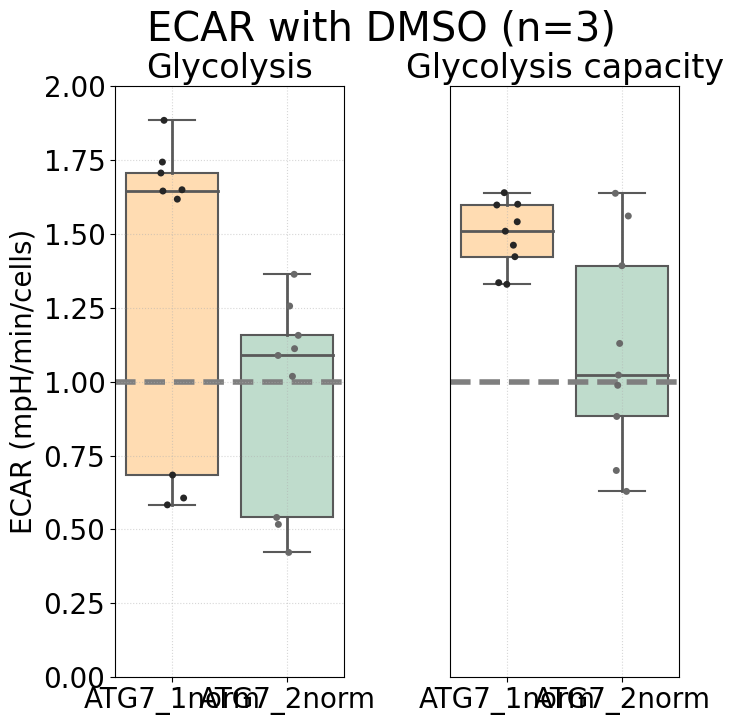

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

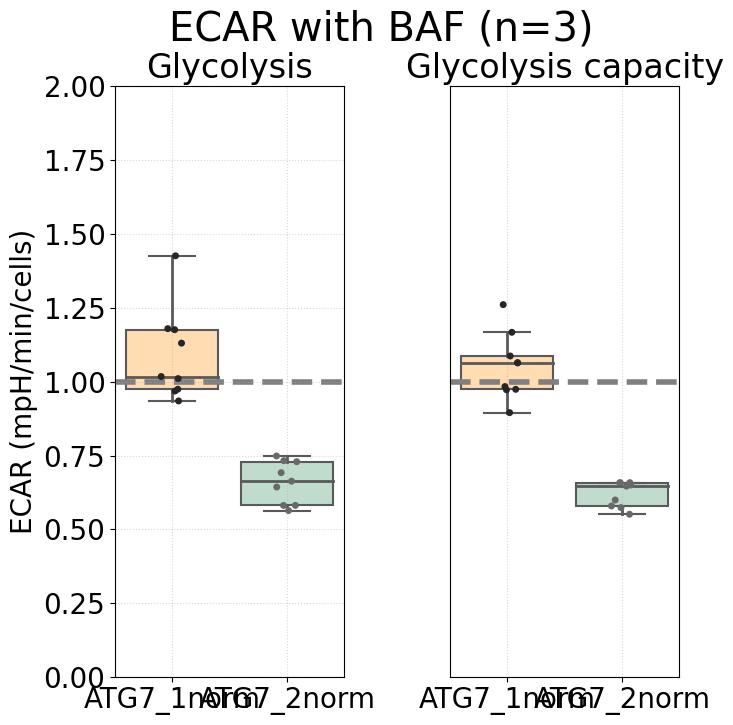

<Figure size 1200x800 with 0 Axes>

In [96]:
# BASAL LEVEL RATE
dfs_glyc = ecar_dmso_glyco, ecar_baf_glyco
dfs_max = ecar_dmso_max, ecar_baf_max
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i][['ATG7_1norm', 'ATG7_2norm']]
    df_max = dfs_max[i][['ATG7_1norm', 'ATG7_2norm']]
    info = infos[i]
    
    
    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ECAR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for GLYCOLYSIS
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco, medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco, color = 'dimgray')
    
    fig.set_title('Glycolysis')
    fig.set_xlabel('')
    fig.set_ylabel('ECAR (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0,2)


    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max, medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max, color = 'dimgray')
   
    fig.set_title('Glycolysis capacity')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0,2)
                
    # save
    path2 = 'seahorse_ECAR/'
    text_file = 'graph_all_ecar_final2_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

## B) Oxygen Consumption Rate 

In [38]:
path

'/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/ATG7/MEF_HuH7/Seahorse_results/'

In [108]:
%%time
file_names = "ocr_final_exp2_", "ocr_final_exp12_", "ocr_final_exp13_"
all_conditions = "dmso", "baf"

ocr_exps = []
#for DMSO and BAF
for condition in all_conditions:
    #For experiment 1, 2 and 3
    for file_name in file_names: 
        #download data
        path2 = f'/seahorse_OCR/dataframes_for_input/{file_name}{condition}.csv'
        df_ori = pandas.read_csv(path+path2, sep = ",")
        print(df_ori.iloc[:2,5:])

        ocr_exps.append(df_ori)

len(ocr_exps)

    info  drug   exp
0  basal  dmso  exp2
1  basal  dmso  exp2
    info  drug    exp
0  basal  dmso  exp12
1  basal  dmso  exp12
    info  drug    exp
0  basal  dmso  exp13
1  basal  dmso  exp13
    info drug   exp
0  basal  baf  exp2
1  basal  baf  exp2
    info drug    exp
0  basal  baf  exp12
1  basal  baf  exp12
    info drug    exp
0  basal  baf  exp13
1  basal  baf  exp13
Wall time: 24.9 ms


6

In [109]:
ocr_exps_subst = []
for df in ocr_exps:
    mean_neg_EV = df.loc[9:,'Empty Vector -dox'].mean()
    mean_neg_EVd = df.loc[9:,'Empty Vector +dox'].mean()
    mean_neg_iso1 = df.loc[9:,'ATG7(1)'].mean()
    mean_neg_iso2 = df.loc[9:,'ATG7(2)'].mean()

    df= df.assign(EV_noD = (df['Empty Vector -dox'] - mean_neg_EV),
                  EVd = (df['Empty Vector +dox'] - mean_neg_EVd),
                  ATG7_1 = (df['ATG7(1)'] - mean_neg_iso1),
                  ATG7_2 = (df['ATG7(2)'] - mean_neg_iso2)) 

    #select columns and don't take the negative controls
    cols = ['Time', 'EV_noD', 'EVd', 'ATG7_1', 'ATG7_2', 'info', 'drug', 'exp']
    df= df.loc[0:8, cols]
    ocr_exps_subst.append(df)
    
df

,Time,EV_noD,EVd,ATG7_1,ATG7_2,info,drug,exp
0,1.31,18.439444,20.0675,20.376667,13.957222,basal,baf,exp13
1,7.76,17.566111,18.4925,18.726667,13.550556,basal,baf,exp13
2,14.21,17.022778,18.1625,18.996667,13.120556,basal,baf,exp13
3,20.67,17.036111,18.2000,19.086667,13.455556,basal,baf,exp13
4,27.13,17.699444,18.1700,18.943333,13.360556,basal,baf,exp13
5,33.58,17.812778,18.0575,18.925000,13.343889,basal,baf,exp13
6,59.57,45.914444,44.1225,43.803333,28.655556,maximal,baf,exp13
7,66.03,50.272778,48.3100,46.275000,32.872222,maximal,baf,exp13
8,72.48,48.564444,48.0525,44.698333,33.080556,maximal,baf,exp13


In [79]:
len(ocr_exps_subst)

6

In [ ]:
#non normalized to see diff with baf 
ocr_exps_subst = pandas.concat([ocr_exps_subst[0], ocr_exps_subst[1], ocr_exps_subst[2],
                              ocr_exps_subst[3], ocr_exps_subst[4], ocr_exps_subst[5]], axis=0)
ocr_exps_subst= ocr_exps_subst.drop(['Time'], axis =1)
ocr_exps_subst.head()

In [110]:
#normalization on EV
steps = 'basal', 'maximal'

ocr_exps_norm = pandas.DataFrame()
for df in ocr_exps_subst:
    for step in steps:
        data = df.loc[df['info'] == step]
        
        #normalize on EV
        norm_df = data.assign(EV_dox_ctl= data['EVd']/ data['EV_noD'],
                              EV_norm= data['EVd']/ data['EVd'],
                              ATG7_1norm= data['ATG7_1']/ data['EVd'],
                              ATG7_2norm= data['ATG7_2']/ data['EVd'])

        ocr_exps_norm = pandas.concat([ocr_exps_norm, norm_df], axis=0)
        
ocr_exps_norm = ocr_exps_norm[['EV_dox_ctl', 'EV_norm', 'ATG7_1norm', 'ATG7_2norm', 'info', 'drug', 'exp']] 
ocr_exps_norm.reset_index(drop = 'True', inplace = True)
ocr_exps_norm.head()

,EV_dox_ctl,EV_norm,ATG7_1norm,ATG7_2norm,info,drug,exp
0,0.704165,1.0,1.550424,1.485107,basal,dmso,exp2
1,0.727079,1.0,1.598749,1.497011,basal,dmso,exp2
2,0.729311,1.0,1.612787,1.509272,basal,dmso,exp2
3,0.729246,1.0,1.616373,1.503630,basal,dmso,exp2
4,0.731268,1.0,1.617821,1.493239,basal,dmso,exp2


### 1) Statistic

In [129]:
#after nomalization
steps = 'basal', 'maximal'
conditions = 'dmso', 'baf'

for step in steps:
    data = ocr_exps_norm.loc[ocr_exps_norm['info'] == step]
    print(step.upper())
    
    for condition in conditions:
        print(condition.upper())
        data2 = data.loc[data['drug'] == condition]
        print(data2, '\n')
        # Mann-Whitney analysis
        #controls
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['EV_norm'], data2['EV_dox_ctl'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue no dox vs EV is {Pvalue}')

        #isoform1 vs ev
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_1norm'], data2['EV_norm'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue ATG7(1) vs EV is {Pvalue}')    

        #isoform2 vs ev
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_2norm'], data2['EV_norm'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue ATG7(2) vs EV is {Pvalue}')    

        #isoforms
        statistic, pvalue = scipy.stats.mannwhitneyu(data2['ATG7_1norm'], data2['ATG7_2norm'])
        Pvalue = "{:.3E}".format(pvalue)
        print(f'pvalue: ATG7(1) vs ATG7(2) is {Pvalue}\n')

BASAL
DMSO
    EV_dox_ctl  EV_norm  ATG7_1norm  ATG7_2norm   info  drug    exp
0     0.704165      1.0    1.550424    1.485107  basal  dmso   exp2
1     0.727079      1.0    1.598749    1.497011  basal  dmso   exp2
2     0.729311      1.0    1.612787    1.509272  basal  dmso   exp2
3     0.729246      1.0    1.616373    1.503630  basal  dmso   exp2
4     0.731268      1.0    1.617821    1.493239  basal  dmso   exp2
5     0.727558      1.0    1.614013    1.488983  basal  dmso   exp2
9     1.407625      1.0    1.004201    0.887606  basal  dmso  exp12
10    1.111694      1.0    1.229826    1.154113  basal  dmso  exp12
11    0.874411      1.0    1.406024    1.492462  basal  dmso  exp12
12    0.820023      1.0    1.309757    1.605785  basal  dmso  exp12
13    0.823673      1.0    1.185083    1.604440  basal  dmso  exp12
14    0.846525      1.0    1.120017    1.553099  basal  dmso  exp12
18    0.875430      1.0    1.323921    0.913550  basal  dmso  exp13
19    0.910537      1.0    1.308129  

In [116]:
ocr_exps_subst.head()

,EV_noD,EVd,ATG7_1,ATG7_2,info,drug,exp
0,255.741667,180.084444,279.207222,267.444667,basal,dmso,exp2
1,222.251667,161.594444,258.348889,241.908667,basal,dmso,exp2
2,214.436667,156.391111,252.225556,236.036667,basal,dmso,exp2
3,209.281667,152.617778,246.687222,229.480667,basal,dmso,exp2
4,206.911667,151.307778,244.788889,225.938667,basal,dmso,exp2


In [127]:
# Before normalization to see difference dmso baf
steps = 'basal', 'maximal'
conditions = 'dmso', 'baf'
ocr_exps_subst
for step in steps:
    data = ocr_exps_subst.loc[ocr_exps_norm['info'] == step]
    print(step.upper())
    
    data_dmso = data.loc[data['drug'] == 'dmso']
    data_baf = data.loc[data['drug'] == 'baf']
    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(data_dmso['EVd'], data_baf['EVd'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue EV with and without baf is {Pvalue}')

    #isoform1 
    statistic, pvalue = scipy.stats.mannwhitneyu(data_dmso['ATG7_1'], data_baf['ATG7_1'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue WT1 with and without baf is {Pvalue}')    

    #isoform2 
    statistic, pvalue = scipy.stats.mannwhitneyu(data_dmso['ATG7_2'], data_baf['ATG7_2'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'pvalue WT2 with and without baf is {Pvalue}')    

BASAL
pvalue EV with and without baf is 6.464E-01
pvalue WT1 with and without baf is 8.868E-01
pvalue WT2 with and without baf is 9.052E-02
MAXIMAL
pvalue EV with and without baf is 5.365E-01
pvalue WT1 with and without baf is 4.268E-01
pvalue WT2 with and without baf is 6.369E-02


### 2) Graphs

In [84]:
ocr_dmso_glyco = ocr_exps_norm.loc[(ocr_exps_norm['info'] == 'basal') & (ocr_exps_norm['drug'] == 'dmso')]
ocr_baf_glyco = ocr_exps_norm.loc[(ocr_exps_norm['info'] == 'basal') & (ocr_exps_norm['drug'] == 'baf')]
ocr_dmso_max = ocr_exps_norm.loc[(ocr_exps_norm['info'] == 'maximal') & (ocr_exps_norm['drug'] == 'dmso')]
ocr_baf_max = ocr_exps_norm.loc[(ocr_exps_norm['info'] == 'maximal') & (ocr_exps_norm['drug'] == 'baf')]

In [86]:
ocr_baf_max

,EV_dox_ctl,EV_norm,ATG7_1norm,ATG7_2norm,info,drug,exp
33,0.662931,1.0,1.698804,0.680432,maximal,baf,exp2
34,0.763245,1.0,1.249141,0.767252,maximal,baf,exp2
35,0.784919,1.0,1.216675,0.835736,maximal,baf,exp2
42,0.850545,1.0,1.783707,0.777444,maximal,baf,exp12
43,0.850547,1.0,1.796374,0.799123,maximal,baf,exp12
44,0.820878,1.0,1.853951,0.874347,maximal,baf,exp12
51,0.960972,1.0,0.992766,0.649454,maximal,baf,exp13
52,0.960957,1.0,0.957876,0.680443,maximal,baf,exp13
53,0.989458,1.0,0.930198,0.688425,maximal,baf,exp13


C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


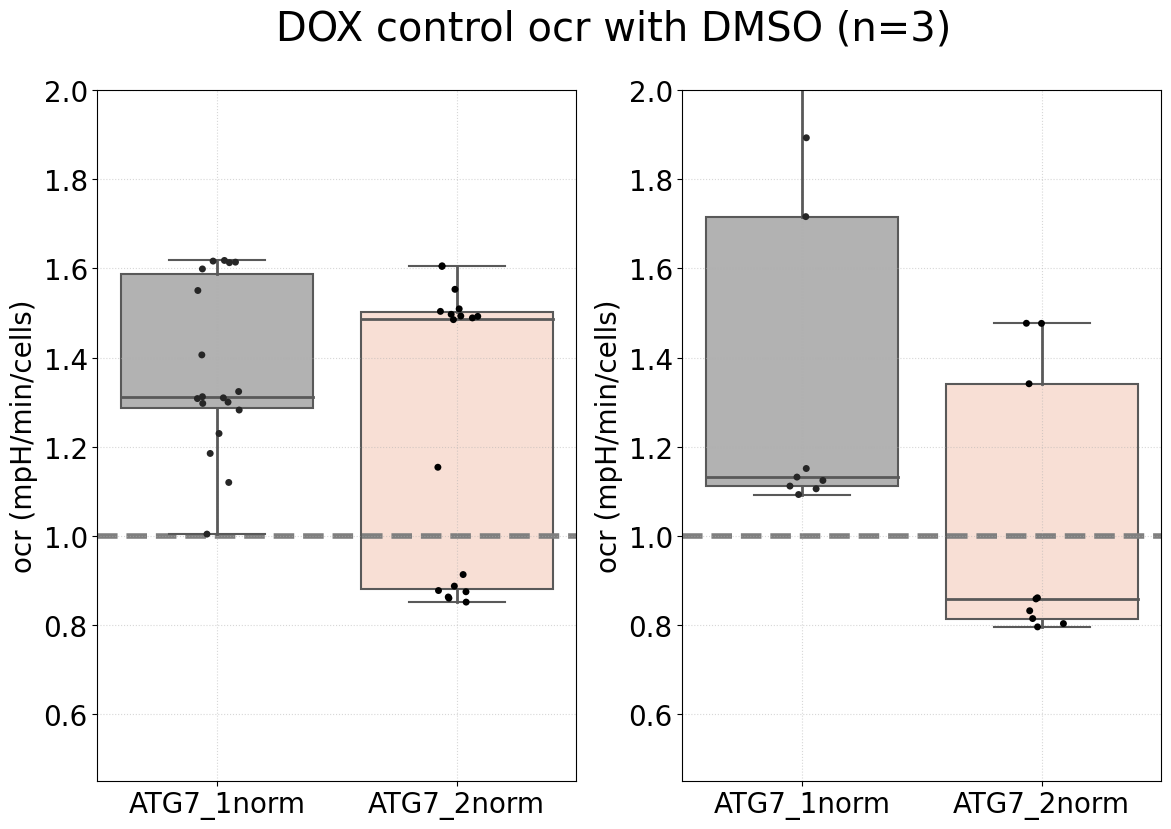

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

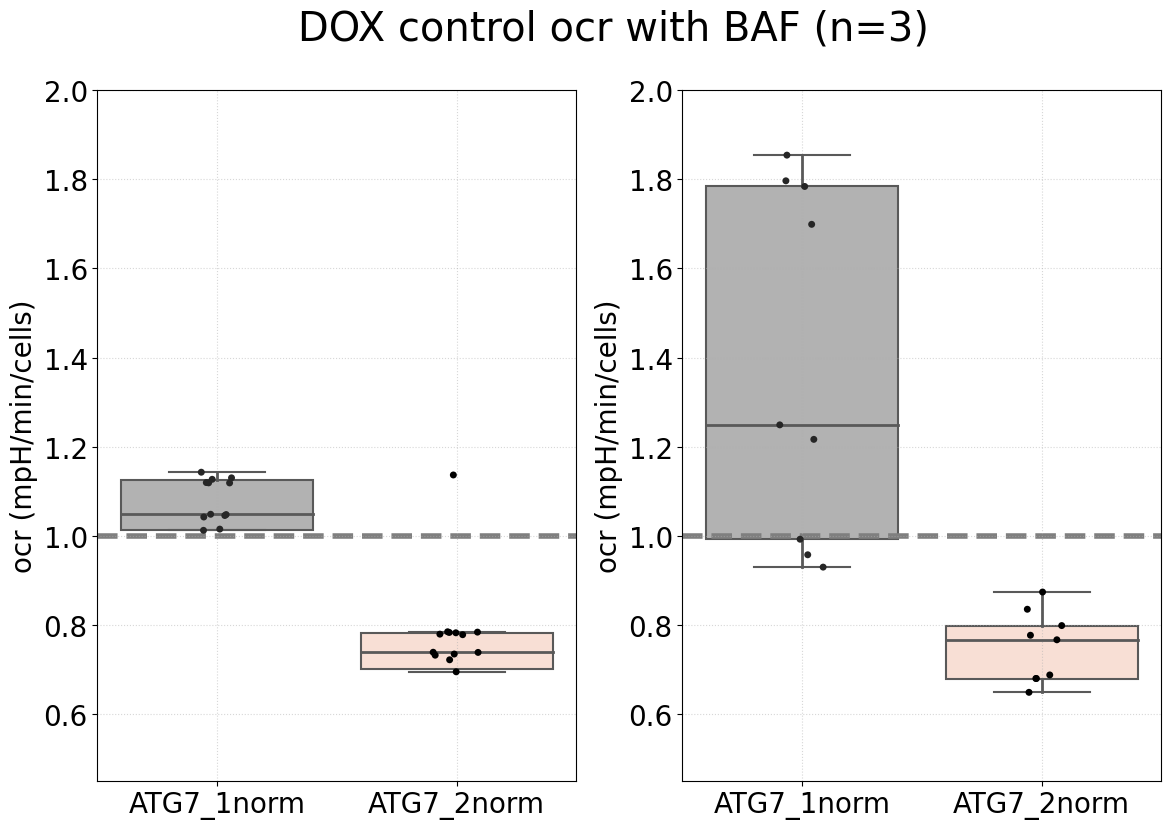

<Figure size 1200x800 with 0 Axes>

In [87]:
# BASAL LEVEL RATE
dfs_glyc = ocr_dmso_glyco, ocr_baf_glyco
dfs_max = ocr_dmso_max, ocr_baf_max
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i]
    df_max = dfs_max[i]
    info = infos[i]

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'DOX control ocr with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for DMSO
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco.iloc[:,2:4], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco.iloc[:,2:4], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ocr (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
    
    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2)


    #graph for BAF
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max.iloc[:,2:4], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max.iloc[:,2:4], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('ocr (mpH/min/cells)')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))
        
    fig.grid(alpha = 0.5, ls = ":")
#     fig.set_ylim(0.45,1.75)

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2)
                
    # save
    path2 = 'seahorse_ocr/'
    text_file = 'graph_all_ocr_final_'+info
#     plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


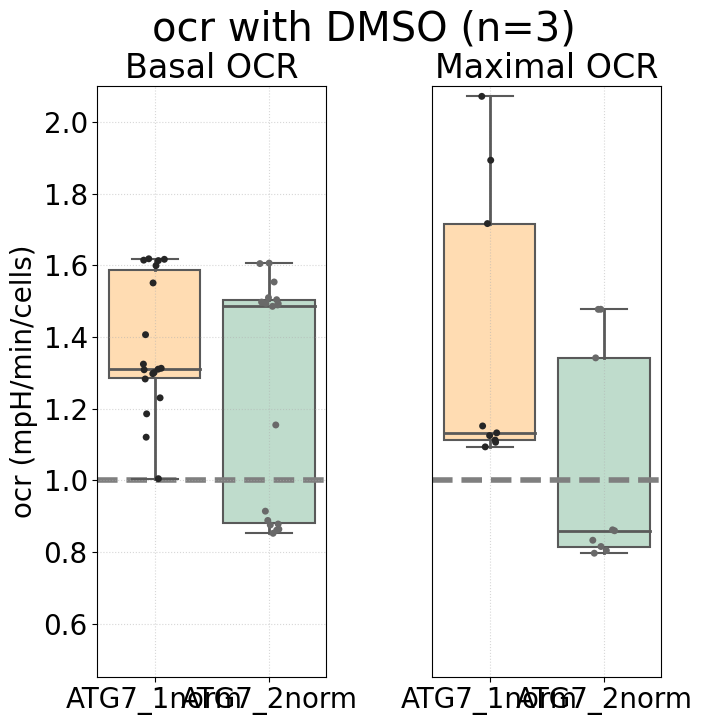

C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\kja11\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:dimgray'` for same effect.
  warnings.warn(msg, FutureWarning)


<Figure size 1200x800 with 0 Axes>

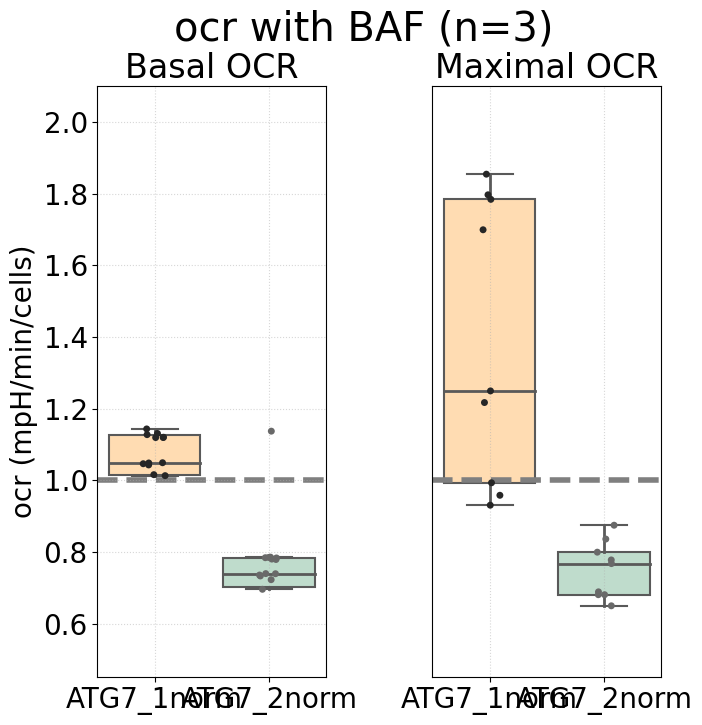

<Figure size 1200x800 with 0 Axes>

In [94]:
# BASAL LEVEL RATE
dfs_glyc = ocr_dmso_glyco, ocr_baf_glyco
dfs_max = ocr_dmso_max, ocr_baf_max
infos = 'DMSO', 'BAF'

for i in range(len(dfs_glyc)):
    df_glyco = dfs_glyc[i][['ATG7_1norm', 'ATG7_2norm']]
    df_max = dfs_max[i][['ATG7_1norm', 'ATG7_2norm']]
    info = infos[i]
    
    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2, figsize=(7, 7))
    plt.tight_layout()
    fig.suptitle(f'ocr with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df_glyco, medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df_glyco, color = 'dimgray')
    
    fig.set_title('Basal OCR')
    fig.set_xlabel('')
    fig.set_ylabel('ocr (mpH/min/cells)')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)

    #graph for MAXIMUM CAPACITY
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df_max, medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df_max, color = 'dimgray')
   
    fig.set_title('Maximal OCR')
    fig.set_xlabel('')
    fig.set_ylabel('')
    fig.set_yticks([])

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_ocr/'
    text_file = 'graph_all_ocr_final2_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

In [ ]:
# BASAL LEVEL RATE
dfs = recap_ocr_dmso_max, recap_ocr_baf_max
infos = 'DMSO', 'BAF'

controls = 'MEF dox control'
iso1 = 'ATG7(1)'
iso2 = 'ATG7(2)'

for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]

    # Mann-Whitney analysis
    #controls
    statistic, pvalue = scipy.stats.mannwhitneyu(df_ori['Empty Vector +dox'], df_ori['Empty Vector -dox'])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between no dox and dox with {info} is {Pvalue} for basal level rate')    

    #isoforms
    statistic, pvalue = scipy.stats.mannwhitneyu(df[iso1], df[iso2])
    Pvalue = "{:.3E}".format(pvalue)
    print(f'the pvalue between ATG7(1) and ATG7(2) with, {info} is {Pvalue}')

    #Figure with 2 graphs
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    fig.suptitle(f'Maximum OCR with {info} (n=3)', y=1.05, fontsize="x-large")

    #graph for controls
    fig = seaborn.boxplot(ax=ax[0], palette = 'Set2', data = df.iloc[:,0:1], medianprops={'lw':2},
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[0], data = df.iloc[:,0:1], color = 'k')
    
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_nodox = fig.patches[0]
    box_nodox.set_facecolor('black')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)


    #graph for ATG7(1) vs ATG7(2)
    fig = seaborn.boxplot(ax=ax[1], palette = 'Set2', data = df.iloc[:,1:], medianprops={'lw':2}, 
                          whiskerprops={'lw':2}, showcaps=True, showfliers=False)
    fig = seaborn.stripplot(ax=ax[1], data = df.iloc[:,1:], color = 'k')
   
    fig.set_xlabel('')
    fig.set_ylabel('Maximum oxygen consumption rate')

    # Select which box you want to change    
    box_iso1 = fig.patches[0]
    box_iso1.set_facecolor('darkorange')
    box_iso2 = fig.patches[1]
    box_iso2.set_facecolor('seagreen')

    # adding transparency to colors
    for patch in fig.patches:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    fig.axhline(y=1, ls='--', lw=4, color='tab:grey', zorder=1)
    fig.grid(alpha = 0.5, ls = ":")
    fig.set_ylim(0.45,2.1)
                
    # save
    path2 = 'seahorse_OCR/'
    text_file = 'graph_all_ocr_maximum_'+info
    plt.savefig(path+path2+text_file+'.svg')
    plt.show()
    plt.clf()

### 2) Maximal level rate